# Master 2 High Performance Computing and Simulation

## Members : lougani faouzi ,hery Andrianantenaina

## Report of module Data & Apprentissage TD1

## Exercice 01


a)Implementation from scratch of our version of the RANSAC algorithm.

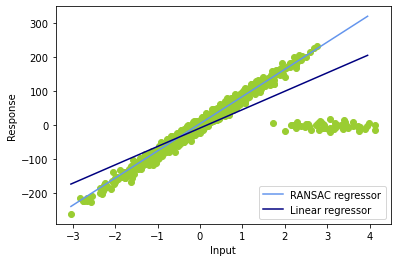

In [1]:
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

def ransac_version(X, y, N, taille, seuil, nb_inliners, reg):
   
    meilleur_ensemble = None
    meilleur_erreur = None
    iterator = 0
    cpt_erreur= 0   
    
    while iterator < N:
    
        # Define the sample of random points and fit model to this sample
        points_aleatoires = np.random.choice(X.shape[0],taille,replace=False)
        x_alea = X[points_aleatoires]
        y_alea = y[points_aleatoires]
        modele_possible = reg.fit(x_alea,y_alea)
        #Construction of the set of points
        points_restant = np.delete(np.arange(X.shape[0]),points_aleatoires)
        #The rest of the points of our dataset
        x_reste= X[points_restant]
        y_reste= y[points_restant]
        #do the prediction 
        y_predit = modele_possible.predict(X)
        v = [prediction-label for (prediction,label) in tuple(zip(y_predit, y_reste))]
        ensemble_points = x_reste[v < seuil]
        inliners_l = y_reste[v < seuil]
        #the cardinality of the set of poits is greater than nb_inliners deduce a new model 
        if len(ensemble_points) > nb_inliners:
            meilleur_x = np.concatenate((x_alea,ensemble_points))
            meilleur_y = np.concatenate((y_alea,inliners_l))
            meilleur_modele = reg.fit(meilleur_x, meilleur_y)
            pred_better = meilleur_modele.predict(meilleur_x)                 
            # Keep the best model if its error is lower than the one already calculated 
            cpt_erreur = mean_squared_error(pred_better,meilleur_y)
            if  meilleur_erreur == None :
                meilleur_erreur = cpt_erreur
                meilleur_ensemble = meilleur_modele
            if  cpt_erreur < meilleur_erreur:
                meilleur_ensemble = meilleur_modele
                meilleur_erreur = cpt_erreur
                
        iterator = iterator + 1
    
    return meilleur_ensemble


#Part of code  taken from Lab 2
N_samples = 1000
N_outliers = 50
X,y,coef = datasets.make_regression(n_samples=N_samples, n_features=1,n_informative=1, noise=10,coef=True, random_state=0)
np.random.seed(0)
X[:N_outliers] = 3 + 0.5 * np.random.normal(size=(N_outliers,1))
y[:N_outliers] = -3 + 10 * np.random.normal(size=N_outliers)


#ransac_version take :
#the data points X,
#the labels y, 
#number of iteration N, 
#the simple size taille,  
#number of inliners nb_inliners.
reg = linear_model.LinearRegression()
ransac_model = ransac_version(X,y,350,X.shape[1]+1,stats.median_abs_deviation(X),X.shape[0]/2,reg)
line_X = np.arange(X.min(),X.max())[:,np.newaxis]
line_y_ransac = ransac_model.predict(line_X)
plt.scatter(X, y, color="yellowgreen")
plt.plot(line_X, line_y_ransac, color="cornflowerblue", label="RANSAC regressor")

#Linear regression, to do comparaison with RANSAC
lin_reg_model = reg.fit(X,y)
line_y_reg = lin_reg_model.predict(line_X)
plt.plot(line_X, line_y_reg, color="navy", label="Linear regressor")

plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()



Comparaison : the figure shows that outliers have effect on linear regression,but not on our Ransac regression. as result Ransac however fits very well.

b) Apply our method to the following cases:
* Using only the part of the inline data that comes from the inclined linear model (about 1000 points). Adding extra 𝑝% of noisy points (where 𝑝 can be 5%, 10%, 20%, 30%) by picking random elements of the data and perturb them "sufficiently" with a Gaussian noise so that they get located far from the rest of the data on both sides.

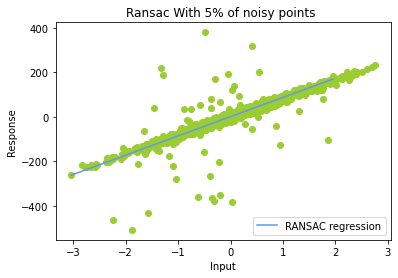

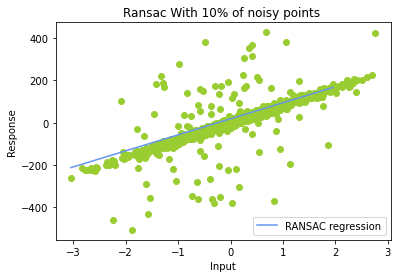

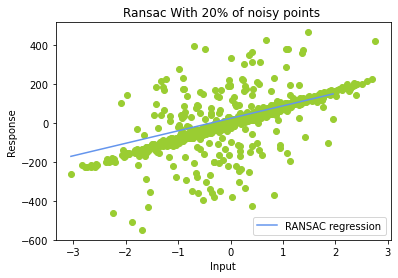

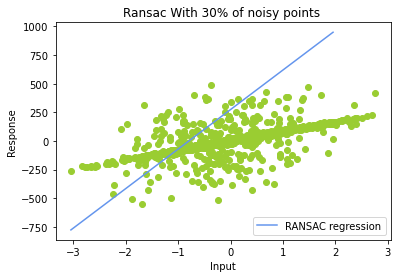

In [4]:
# case 5%
#define number of samples
N_samples = 1000
temp=N_samples * (5/100)
scale=20
#cast temp to get nb outiliers 
N_outliers = int(temp)
X, y, coef = datasets.make_regression(n_samples=N_samples, n_features=1,n_informative=1, noise=10,coef=True, random_state=0)
# Add outlier data

np.random.seed(0)
point_outlier= np.random.choice(X.shape[0],N_outliers,replace=False)
y[point_outlier]= y[point_outlier] + 10 * np.random.normal(0,scale,N_outliers)
# Predict data of ransac model
ransac_model = ransac_version(X,y,300,X.shape[1]+1,stats.median_abs_deviation(X),X.shape[0]/2,reg)
line_X = np.arange(X.min(),X.max())[:,np.newaxis]
line_y = ransac_model.predict(line_X)
#plot results
plt.figure(1)
plt.title("Ransac With 5% of noisy points ")
plt.scatter(X, y, color="yellowgreen")
plt.plot(line_X, line_y, color="cornflowerblue", label="RANSAC regression")
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")


#case 10%
#define number of samples
N_samples = 1000
temp=N_samples * (10/100)
#cast temp to get nb outiliers 
N_outliers = int(temp)
X, y, coef = datasets.make_regression(n_samples=N_samples, n_features=1,n_informative=1, noise=10,coef=True, random_state=0)
# Add outlier data
np.random.seed(0)
point_outlier= np.random.choice(X.shape[0],N_outliers,replace=False)
y[point_outlier]= y[point_outlier] + 10 * np.random.normal(0,scale,N_outliers)
# Predict data of ransac model
ransac_model = ransac_version(X,y,300,X.shape[1]+1,stats.median_abs_deviation(X),X.shape[0]/2,reg)
line_X = np.arange(X.min(),X.max())[:,np.newaxis]
line_y = ransac_model.predict(line_X)
#plot results
plt.figure(2)
plt.title("Ransac With 10% of noisy points ")
plt.scatter(X, y, color="yellowgreen")
plt.plot(line_X, line_y, color="cornflowerblue", label="RANSAC regression")
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")


#case 20%
#define number of samples
N_samples = 1000
temp=N_samples * (20/100)
#cast temp to get nb outiliers 
N_outliers = int(temp)
X, y, coef = datasets.make_regression(n_samples=N_samples, n_features=1,n_informative=1, noise=10,coef=True, random_state=0)
# Add outlier data
np.random.seed(0)
point_outlier= np.random.choice(X.shape[0],N_outliers,replace=False)
y[point_outlier]= y[point_outlier] + 10 * np.random.normal(0,scale,N_outliers)
# Predict data of ransac model
ransac_model = ransac_version(X,y,300,X.shape[1]+1,stats.median_abs_deviation(X),X.shape[0]/2,reg)
line_X = np.arange(X.min(),X.max())[:,np.newaxis]
line_y = ransac_model.predict(line_X)
#plot results
plt.figure(3)
plt.title("Ransac With 20% of noisy points ")
plt.scatter(X, y, color="yellowgreen")
plt.plot(line_X, line_y, color="cornflowerblue", label="RANSAC regression")
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")

#case30

#define number of samples
N_samples = 1000
temp=N_samples * (30/100)
#cast temp to get nb outiliers 
N_outliers = int(temp)
X, y, coef = datasets.make_regression(n_samples=N_samples, n_features=1,n_informative=1, noise=10,coef=True, random_state=0)
# Add outlier data
np.random.seed(0)
point_outlier= np.random.choice(X.shape[0],N_outliers,replace=False)
y[point_outlier]= y[point_outlier] + 10 * np.random.normal(0,scale,N_outliers)
# Predict data of ransac model
ransac_model = ransac_version(X,y,300,X.shape[1]+1,stats.median_abs_deviation(X),X.shape[0]/2,reg)
line_X = np.arange(X.min(),X.max())[:,np.newaxis]
line_y = ransac_model.predict(line_X)
#plot results
plt.figure(4)
plt.title("Ransac With 30% of noisy points ")
plt.scatter(X, y, color="yellowgreen")
plt.plot(line_X, line_y, color="cornflowerblue", label="RANSAC regression")
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")

plt.show()


By analysing figures we can deduce that If the percentage of noisy points is low (p% betwen 5% and 10% for example) it is more likely to have sample without outliers but if we increase more points ,This perturbation with a Gaussian noise affect our ransac especially from p=30% .

* Do as in the previous but the perturbation to be only positive (all noisy points will be above the inline data.

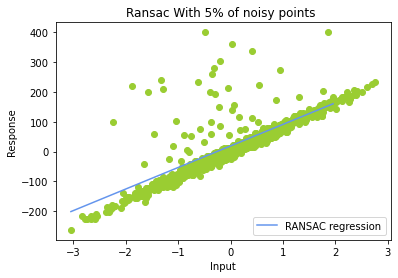

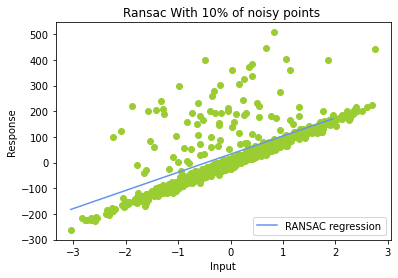

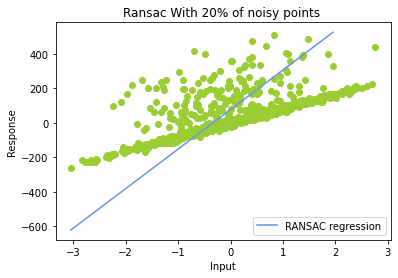

In [6]:
# case 5%
#define number of samples
N_samples = 1000
temp=N_samples * (5/100)
scale=20
#cast temp to get nb outiliers 
N_outliers = int(temp)
X, y, coef = datasets.make_regression(n_samples=N_samples, n_features=1,n_informative=1, noise=10,coef=True, random_state=0)
# Add outlier data
np.random.seed(0)
point_outlier= np.random.choice(X.shape[0],N_outliers,replace=False)
v=np.random.normal(2,20,N_outliers)
y[point_outlier]= y[point_outlier] + 10 * np.absolute(v)
# Predict data of ransac model
ransac_model = ransac_version(X,y,300,X.shape[1]+1,stats.median_abs_deviation(X),X.shape[0]/2,reg)
line_X = np.arange(X.min(),X.max())[:,np.newaxis]
line_y = ransac_model.predict(line_X)
#plot results
plt.figure(1)
plt.title("Ransac With 5% of noisy points ")
plt.scatter(X, y, color="yellowgreen")
plt.plot(line_X, line_y, color="cornflowerblue", label="RANSAC regression")
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")

#case 10%
#define number of samples
N_samples = 1000
temp=N_samples * (10/100)
#cast temp to get nb outiliers 
N_outliers = int(temp)
X, y, coef = datasets.make_regression(n_samples=N_samples, n_features=1,n_informative=1, noise=10,coef=True, random_state=0)
# Add outlier data
np.random.seed(0)
point_outlier= np.random.choice(X.shape[0],N_outliers,replace=False)
v=np.random.normal(2,20,N_outliers)
y[point_outlier]= y[point_outlier] +10*np.absolute(v)
# Predict data of ransac model
ransac_model = ransac_version(X,y,300,X.shape[1]+1,stats.median_abs_deviation(X),X.shape[0]/2,reg)
line_X = np.arange(X.min(),X.max())[:,np.newaxis]
line_y = ransac_model.predict(line_X)
#plot results
plt.figure(2)
plt.title("Ransac With 10% of noisy points ")
plt.scatter(X, y, color="yellowgreen")
plt.plot(line_X, line_y, color="cornflowerblue", label="RANSAC regression")
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")


#case 20%
#define number of samples
N_samples = 1000
temp=N_samples * (20/100)
#cast temp to get nb outiliers 
N_outliers = int(temp)
X, y, coef = datasets.make_regression(n_samples=N_samples, n_features=1,n_informative=1, noise=10,coef=True, random_state=0)
# Add outlier data
np.random.seed(0)
point_outlier= np.random.choice(X.shape[0],N_outliers,replace=False)
v=np.random.normal(2,20,N_outliers)
y[point_outlier]= y[point_outlier] + 10 * np.absolute(v)
# Predict data of ransac model
ransac_model = ransac_version(X,y,300,X.shape[1]+1,stats.median_abs_deviation(X),X.shape[0]/2,reg)
line_X = np.arange(X.min(),X.max())[:,np.newaxis]
line_y = ransac_model.predict(line_X)
#plot results
plt.figure(3)
plt.title("Ransac With 20% of noisy points ")
plt.scatter(X, y, color="yellowgreen")
plt.plot(line_X, line_y, color="cornflowerblue", label="RANSAC regression")
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")

plt.show()


here we see the impact quickly (with 20% of noisy points)unlike the previous case (with 30% of noisy points),we deduce that even positive noise affect our ransac. 

## Exercice 02

a) How we can design a solution to the problem of robust estimate of the center of a data point cloud that adopts 
the RANSAC principle.

1. Define NB as the number of times we will redo steps 2,3,4,5,6
2. Calculate the error R which will be half of the greatest distance between two points of the set.
3. Define N_C the number of points that we accept to consider a point as a center
4. Choose a random point in the data set.
5. Calculate the distance between this random point and the others. If the distance < N_C, add it to the cloud of the chosen center
6. If the number of points associated with the chosen center > N_C, this point will be the center ,then the new center will replace the old center defined in a previous iteration if its cloud is greater.
7. Repeat NB steps, then return to the last iteration where the center is found.



b) Extend this approach to the clustering of the data in a given number of 𝑘 clusters by considering an existing clustering method, such as 𝑘-means, as the internal model learner).

1. We take a clustering method based on the centre like k-means as a learner of the internal model.
2. To have a first model,We use the k-means algorithm to take random k-center to calculate the distance of each point to the centers and according to this distance then calculate the error of each cluster and stock them, for this we apply the steps defines in question a) to calculate the centers of each cluster.
3. We choose k new centers randomly and we repeat the last process (2) then we compare the error of each new center and to the old and we change the very distant centers to deduce a new model.
4. The model with clusters having the best error according to a given number of iteration K will be in the last iteration. 




c) Could you imagine other applications?

* Recognition of objects is one of the RANSAC applications.


d) Abstract pseudocode that expresses the generalization of RANSAC in arbitrary learning problems

* Select N (the number of samples)randomly. 
* we estimates a model hypothesis for each sample.
* find the number of inliers for each hypothesis.
* we chose the hypothesis with largest number of inliners as a model and use them to affect model parameters.
* The inlier is chosen as a point that his residual R is in some threshold T of the hypothesis.
* We can deduce the correct hypothesis because our N samples contain at least one sample  which consists of only true correspondences.





## Exercice 03

Cross validation :
it is a technique used to see how well will the model fit to unknown data, based on deviding the set of data that we have into multiple sets, that we will use either to train the model or to test it

Using this technique for time series involve taking into account new data generated as time goes. This can make a problem because observations from the training set must occur before their corresponding test set =>temporal dependency between observations, and that every test set contains unique observations =>good choice of test set

Here we start with a small subset of data for training purpose, forecast for the later data points and then checking the accuracy for the forecasted data points. The same forecasted data points are then included as part of the next training dataset and subsequent data points are forecasted,As the following example explains:

* We do training 1 then the test 2
* We do training 1 and 2 then the test 3
* We do training 1,2,3 then test 4


Pseudocode that would apply (i) and (ii) will be like:



## Exercice 04

a) multi-class SVM with the <1 class-vs-all classes> architecture, where 𝑘 classifiers as many as the classes, and each one of them will be trained to distinguish the objects of one class against any other class.
c)Make a simple demonstration on Iris dataset

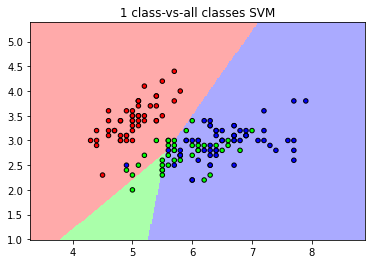

In [7]:
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

 

#load iris data by Taking the first two features using 2D dataset
iris_data = datasets.load_iris()
X = iris_data.data[:, :2]
Y = iris_data.target


# split traning and test sets, 
X_train, X_test, y_train, y_test = \
train_test_split(X, Y, stratify=Y, test_size=0.7)
    
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#begin to learn predict each class against the other
# Create an SVM instance and fit out data. here to plot the support vectors we will not scale our data .
clf = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
#predicting the label k for which the corresponding classifier reports the highest confidence score 
y_score = clf.fit(X_train, y_train).decision_function(X_test)

#Plot the decision boundary. 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# step size in the mesh
h = .02 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold,edgecolor='k', s=20)
plt.title(" 1 class-vs-all classes SVM ")
plt.show()

b) multi-class SVM with <*1 class-vs-1 class*> architecture, where we will need $\frac{1}{2}(k-1)^2$ classifiers, each one of them deciding among two classes only.c)Make a simple demonstration on Iris dataset  

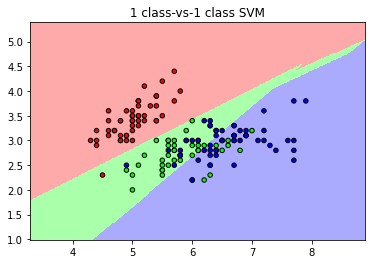

In [12]:
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#load iris data by Taking the first two features using 2D dataset
iris_data = datasets.load_iris()
X = iris_data.data[:, :2]
y = iris_data.target

#This is implemented as ``argmax(decision_function(X), axis=1)`` which will return the label of the class with most votes by estimators predicting the outcome of a decision for each possible class pair.


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, stratify=y, test_size=0.7)

#begin to learn predict each class against the other
# Create an SVM instance and fit out data. here to plot the support vectors we will not scale our data .
clf = OneVsOneClassifier(LinearSVC(max_iter=1000000, random_state=0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)

#Plot the decision boundary. 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# step size in the mesh
h = .02 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,edgecolor='k', s=20)
plt.title(" 1 class-vs-1 class SVM ")

plt.show()


## Exercice 05




a) Demonstrate its performance and behavior in a benchmark dataset like the Iris dataset or any other dataset used in the exercises (use about 20 SVMs, or justify a different choice empirically), also compare that performance against the non-Ensemble learning with the same type of base model... (this is multi-class SVM).


The principe  of ensemble methods is that multiple weak models with not particularly good, but just sufficient performance can be used to synthesize a decision our of their individual decisions, and achieve better performance than a single very well-performing model on its own.

Tis technique will give us the following results : 
* 20 SVM with 20% random sampling => 1 SVM with 90% sampling and 10% test.
* we will aviod over fiting since we are using bagging, we will use 20 random samples with replacement  one data can figure in several samples 




b)At first do the analysis and experiments for the first two classes of the dataset, and then extend to all the classes.

SVM Ensemble Model Accuracy = 0.9666666666666668
SVM multi-class Model Accuracy = 0.9083333333333333


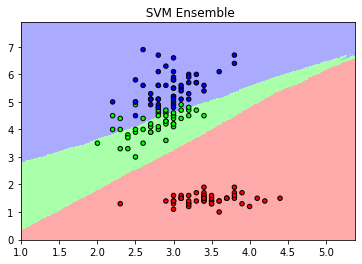

In [2]:
#two classes of the dataset
#two classes of the dataset
from sklearn.svm import LinearSVC
from sklearn.ensemble import BaggingClassifier
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn import model_selection

iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target
# Spliting data to train set and test set. This may be changed to see how model reacts 
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, stratify=y, test_size=0.8)
 
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
# Define model, we will use built in SVC and Bagging classifier to get an SVM Ensemble method
svm = LinearSVC(max_iter=10000, random_state=42)
model = BaggingClassifier(base_estimator=svm, n_estimators=20, random_state=314)

# Using the usual SVC
clf = LinearSVC(max_iter=10000, random_state=42)
clf.fit(X_train, y_train)
score2 = clf.score(X_test, y_test)
# Fit
model.fit(X_train, y_train)
# SVM Ensemble score calculating
score = model_selection.cross_val_score(model, X_test, y_test)

print("SVM Ensemble Model Accuracy =", score.mean())
print("SVM multi-class Model Accuracy =", score2)



h = .02  # step size in the mesh

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.title(" SVM Ensemble")
plt.axis('tight')
plt.axis('tight')
plt.show() 

* Through this application that we get a slitly diffrence results in term of model accuracy. at the end even if we splitted the data to three classes both of model give more performant classification.

* SVM Ensemble is a little bit better. by changing sampling percentage, we can see how accuracy changes but most of the times SVM Ensemble will still give credible results. and in order to see the weakness of the previous model, We choose a big set of test. 

In [4]:
#all classes of the dataset
#all classes of the dataset
from sklearn.svm import LinearSVC
from sklearn.ensemble import BaggingClassifier
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn import model_selection

X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, stratify=y, test_size=0.2)
 
# Define model 
svm = LinearSVC(max_iter=10000, random_state=42)
model = BaggingClassifier(base_estimator=svm, n_estimators=20, random_state=314)

clf = LinearSVC(max_iter=10000, random_state=42)
clf.fit(X_train, y_train)
score2 = clf.score(X_test, y_test)
# Fit
model.fit(X_train, y_train)
score = model_selection.cross_val_score(model, X_test, y_test)
print("SVM Ensemble Model Accuracy =", score.mean())
print("SVM multi-class Model Accuracy =", score2)

/home/louganifaouzi/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/louganifaouzi/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/louganifaouzi/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM Ensemble Model Accuracy = 1.0
SVM multi-class Model Accuracy = 0.9666666666666667


* We deduce that both of methods provides satistfying results.

* The amount of data that the model was trained with allows us to classify the best model ,we can also have a very close results accuracy.


c) What is the common points and differences (in terms of architecture and principle of learining) between an SVM Ensemble and the multi-class SVM architectures developed in Exercise 4? 


* The commun point between SVM Ensemble and multi-class SVMs in the way of training :is that both of them use a set of weak SVMs which are trained to construt a strong model given a better results

* The difference is the way of training is SVM Ensemble use diffrent random part pf the train-set but the one_vs_on_model or one_vs_ all_model uses a diffrent type of classes to distingush for the traiing phase.